In [2]:
import numpy as np
import tensorflow as tf

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('/Users/someswararaotarra/Desktop/SET_PROJECT/Dataset/Dataset_NEW')

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

['Rust', 'Miner']
Types of classes labels found:  2


In [3]:
class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir('/Users/someswararaotarra/Desktop/SET_PROJECT/Dataset/Dataset_NEW' + '/' +item)
 #print(all_classes)


 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('/Users/someswararaotarra/Desktop/SET_PROJECT/Dataset/Dataset_NEW' + '/' +item) + '/' + room))
    #print(class_labels[:5])

In [4]:

# Build a dataframe        
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

  Labels                                              image
0   Rust  /Users/someswararaotarra/Desktop/SET_PROJECT/D...
1   Rust  /Users/someswararaotarra/Desktop/SET_PROJECT/D...
2   Rust  /Users/someswararaotarra/Desktop/SET_PROJECT/D...
3   Rust  /Users/someswararaotarra/Desktop/SET_PROJECT/D...
4   Rust  /Users/someswararaotarra/Desktop/SET_PROJECT/D...
    Labels                                              image
569  Miner  /Users/someswararaotarra/Desktop/SET_PROJECT/D...
570  Miner  /Users/someswararaotarra/Desktop/SET_PROJECT/D...
571  Miner  /Users/someswararaotarra/Desktop/SET_PROJECT/D...
572  Miner  /Users/someswararaotarra/Desktop/SET_PROJECT/D...
573  Miner  /Users/someswararaotarra/Desktop/SET_PROJECT/D...


In [5]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  574
Labels
Rust     287
Miner    287
Name: count, dtype: int64


In [6]:
import cv2
path = '/Users/someswararaotarra/Desktop/SET_PROJECT/Dataset/Dataset_NEW/'
dataset_path = os.listdir('/Users/someswararaotarra/Desktop/SET_PROJECT/Dataset/Dataset_NEW')

im_size = 240

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [7]:

#This model takes input images of shape (224, 224, 3), and the input data should range [0, 255]. 

images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(574, 240, 240, 3)

In [8]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

['Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust'
 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust'
 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust'
 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust'
 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust'
 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust'
 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust'
 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust'
 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust'
 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust'
 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust'
 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust'
 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust'
 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust' 'Rust'
 'Rust

In [9]:

y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) #.toarray()
print(Y[:5])
print(Y[35:])

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [10]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)



(545, 240, 240, 3)
(545, 2)
(29, 240, 240, 3)
(29, 2)


# EfficientNet Implementation :


In [11]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB1

NUM_CLASSES = 2
IMG_SIZE = 240
size = (IMG_SIZE, IMG_SIZE)


inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))


# Using model without transfer learning

outputs = EfficientNetB1(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [12]:
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )

model.summary()

hist = model.fit(train_x, train_y, epochs=100, verbose=2)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 240, 240, 3)]     0         
                                                                 
 efficientnetb1 (Functional  (None, 2)                 6577801   
 )                                                               
                                                                 
Total params: 6577801 (25.09 MB)
Trainable params: 6515746 (24.86 MB)
Non-trainable params: 62055 (242.41 KB)
_________________________________________________________________
Epoch 1/100
18/18 - 54s - loss: 3.3421 - accuracy: 0.5817 - 54s/epoch - 3s/step
Epoch 2/100
18/18 - 48s - loss: 1.1476 - accuracy: 0.6936 - 48s/epoch - 3s/step
Epoch 3/100
18/18 - 43s - loss: 0.8378 - accuracy: 0.7706 - 43s/epoch - 2s/step
Epoch 4/100
18/18 - 57s - loss: 0.4942 - accuracy: 0.8220 - 57s/epoch - 3s/step
Epoch 5/100
18/18 - 58s - l

Epoch 93/100
18/18 - 49s - loss: 0.0291 - accuracy: 0.9927 - 49s/epoch - 3s/step
Epoch 94/100
18/18 - 51s - loss: 0.0093 - accuracy: 0.9982 - 51s/epoch - 3s/step
Epoch 95/100
18/18 - 52s - loss: 0.0070 - accuracy: 0.9963 - 52s/epoch - 3s/step
Epoch 96/100
18/18 - 53s - loss: 0.0154 - accuracy: 0.9963 - 53s/epoch - 3s/step
Epoch 97/100
18/18 - 54s - loss: 0.0554 - accuracy: 0.9835 - 54s/epoch - 3s/step
Epoch 98/100
18/18 - 48s - loss: 0.0383 - accuracy: 0.9835 - 48s/epoch - 3s/step
Epoch 99/100
18/18 - 50s - loss: 0.0594 - accuracy: 0.9817 - 50s/epoch - 3s/step
Epoch 100/100
18/18 - 43s - loss: 0.0407 - accuracy: 0.9817 - 43s/epoch - 2s/step


In [19]:
# Save the trained model
model.save("Efficient_B1_Trained_model.h5")


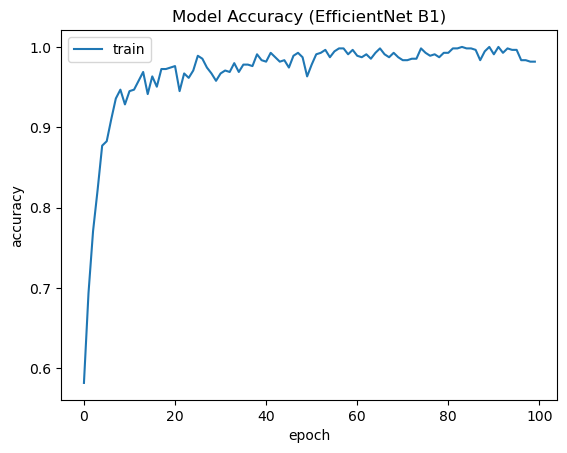

In [22]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("Model Accuracy (EfficientNet B1)")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.savefig("model_accuracy_plot_B1.png")  # Save the figure as "model_accuracy_plot.png"
    plt.show()


plot_hist(hist)

In [21]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1/1 [==============================] - 0s 437ms/step - loss: 3.8240 - accuracy: 0.5862
Loss = 3.823951244354248
Test Accuracy = 0.5862069129943848


# Testing Efficient Model On Unseen data

Input image shape: (1, 240, 240, 3)


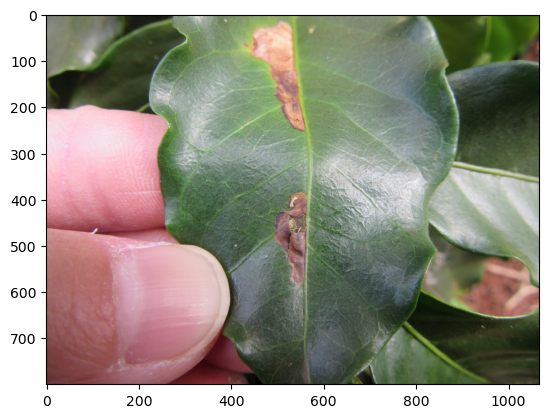

In [16]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input



img_path = '/Users/someswararaotarra/Desktop/SET_PROJECT/TEST_img/img2.jpg'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (240, 240))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [17]:
from keras.models import load_model

# Loading the saved model
loaded_model = load_model('Efficient_B1_Trained_model.h5')

preds=loaded_model.predict(x)
preds     # probabilities for being in each of the 3 classes

1/1 [==============================] - 1s 581ms/step


array([[0., 1.]], dtype=float32)

In [18]:
# Making predictions
preds = model.predict(x)

# class labels 
class_labels = ["Miner","Rust"]

# Printing class names and their respective probabilities
for i in range(len(class_labels)):
    print(f"{class_labels[i]}: {preds[0][i]}")


1/1 [==============================] - 1s 578ms/step
Miner: 0.0
Rust: 1.0
